In [1]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from astropy.timeseries import LombScargle
from scipy.signal import find_peaks
import os
print("Carge las librerias")

Carge las librerias


In [2]:
archivo1 = fits.open('Medias-Desviacion279.fits')
series_ks_n_filtrado=np.array(archivo1[10].data)
errores_ks_n_filtrado=np.array(archivo1[11].data)
archivo = fits.open('TCampo_b279.fits')
HJD=archivo[1].data
print("cargue los archivos")

In [3]:
def seleccionar_subarrays_aleatorios(series, errores, cantidad):
    indices_aleatorios = random.sample(range(len(series)), cantidad)
    ks_aleatorios = [series[i] for i in indices_aleatorios]
    errores_aleatorios = [errores[i] for i in indices_aleatorios]
    return ks_aleatorios, errores_aleatorios

cantidad_subarrays = 200000
ks_aleatorios, errores_aleatorios = seleccionar_subarrays_aleatorios(series_ks_n_filtrado, errores_ks_n_filtrado, cantidad_subarrays)
print(len(ks_aleatorios))

10


In [4]:
def eliminar_nan(error, ks, HJD):
    indices_validos = ~np.isnan(ks)
    error_filtrado = [error[i] for i in range(len(ks)) if indices_validos[i]]
    ks_filtrado = [ks[i] for i in range(len(ks)) if indices_validos[i]]
    HJD_filtrado = [HJD[i] for i in range(len(ks)) if indices_validos[i]]
    return error_filtrado, ks_filtrado, np.round(HJD_filtrado,8)

ks_nan=[]
error_nan=[]
HJD_na=[]
y=0
while y<len(ks_aleatorios):
    error_filtrado, ks_filtrado, HJD_filtrado = eliminar_nan(errores_aleatorios[y], ks_aleatorios[y], HJD-2400000)
    ks_nan.append(ks_filtrado)
    error_nan.append(error_filtrado)
    HJD_na.append(HJD_filtrado)
    y+=1

print(len(HJD_na))

10


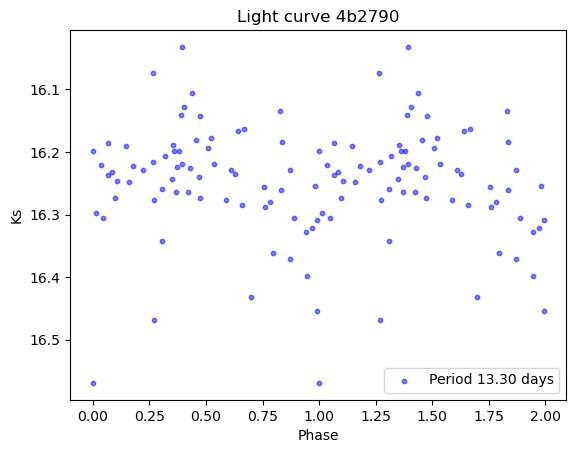

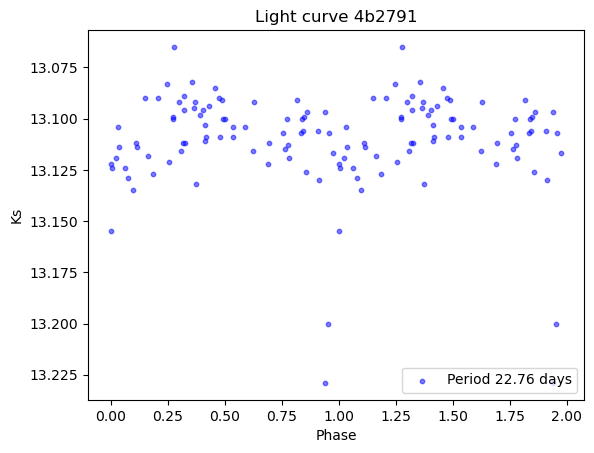

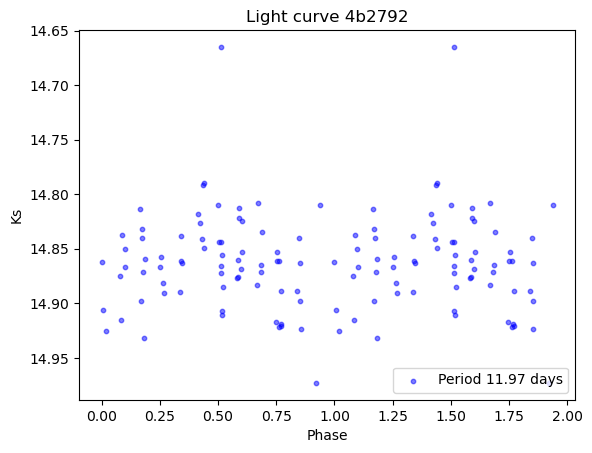

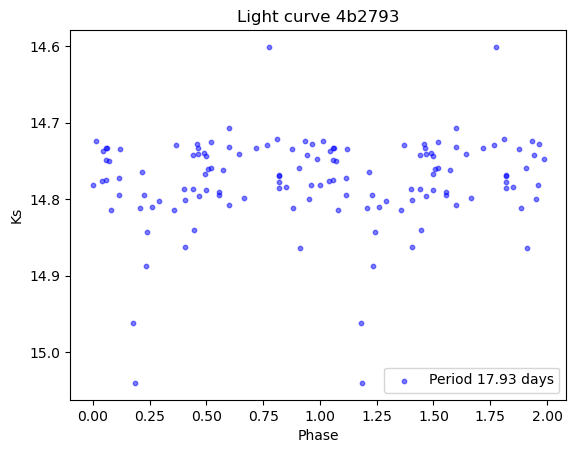

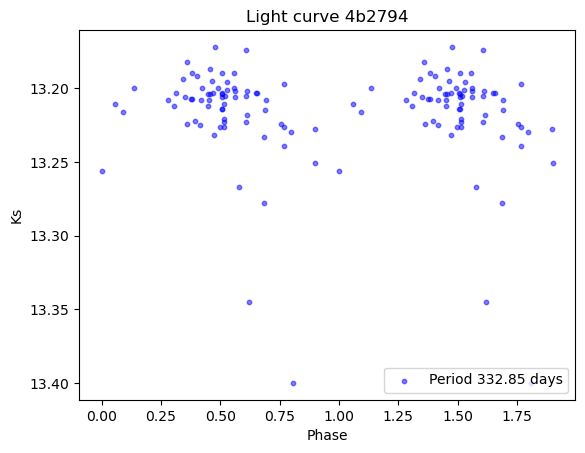

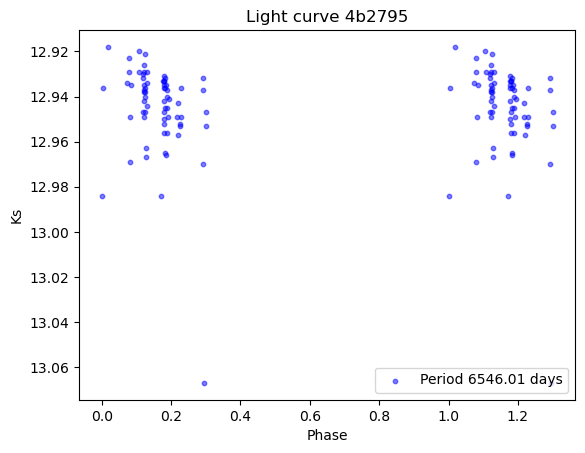

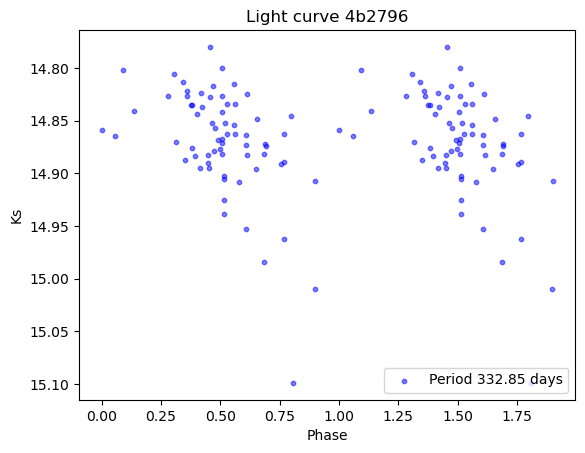

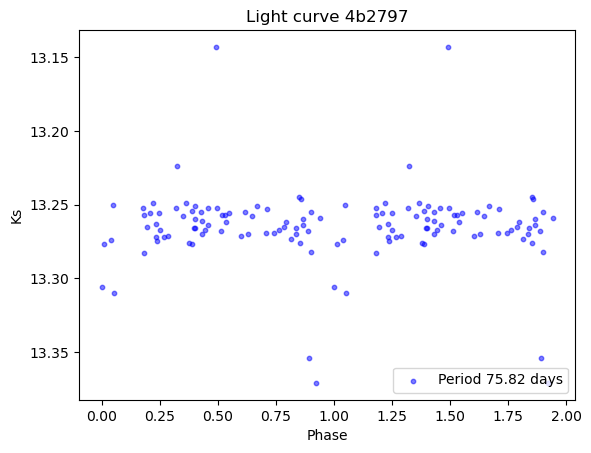

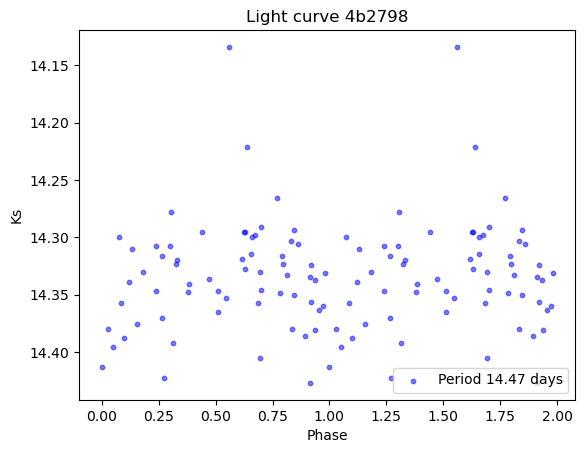

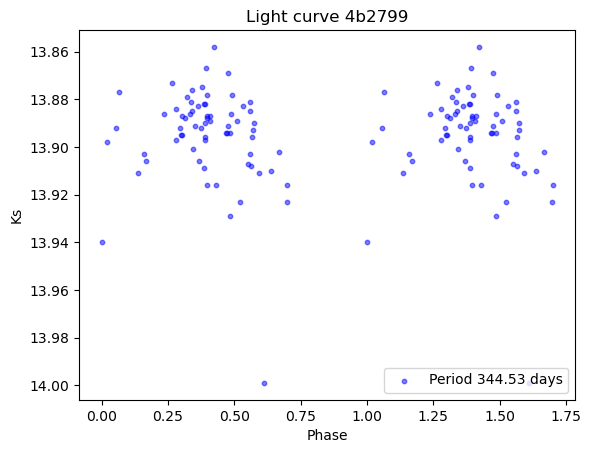

In [12]:
x=0
while x<len(ks_nan):
    S=ks_nan[x]
    Date=HJD_na[x]
    frequency, power = LombScargle(Date, S).autopower()
    # Encontrar picos en el espectro de potencia
    peaks, _ = find_peaks(power)
    # Obtener los 5 picos más significativos
    sorted_peaks = sorted(peaks, key=lambda x: power[x], reverse=True)[:5]
    frecuencia, potencia= frequency[sorted_peaks], list(power[sorted_peaks])
    max_p=max(potencia)
    r = potencia.index(max_p)
    f=frecuencia[r]
    P=1/f
    t_0 = Date[0]
    # 3. Calcular la fase para cada punto de tus datos
    fase = ((Date - t_0) / P) - np.floor((Date - t_0) / P)
    plt.scatter(fase, S, s=10, c='blue', alpha=0.5)
    plt.xlabel('Phase')
    plt.ylabel('Ks')
    # Invertir el eje y
    plt.gca().invert_yaxis()
    plt.title('Light curve '+"4b279"+str(x))
    # Muestra la leyenda con el período promedio
    plt.legend(['Period {:.2f} days'.format(P)], loc='lower right')
    # Guarda la gráfica en un archivo
    plt.scatter(fase + 1, S, s=10, c='blue', alpha=0.5)
    #plt.savefig('Curva3_b279.png')
    plt.show()
    plt.savefig("4b279"+ str(x))
    plt.close()
    x+=1